<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[MoonshotML Intro](Introduction.ipynb) › Part 3: Walk-forward Optimization
***

# MoonshotML Walk-forward Optimization

To backtest a machine learning strategy, we run a special type of backtest called a walk-forward optimization. 

In a walk-forward optimization, the data is split into segments. The model is trained on the first segment of data then tested on the second segment, then trained again with the second segment and tested on the third segment, and so on. 

Splitting the data into segments is necessary so that the model can learn from the data and also make predictions about the same data, without lookahead bias. (In a traditional backtest of a non-ML strategy, splitting the data into training and testing segments is not necessary because the strategy is not learning as it goes.)

QuantRocket logs the training and testing periods to flightlog during the walk-forward optimization, so it's a good idea to open flightlog before running the simulation:

In [1]:
%flightlog

To run a walk-forward optimization, we use the `quantrocket.moonshot.ml_walkforward` function. 

* We set the `model_filepath` parameter to point to the random forest model we saved to disk in the previous notebook. 
* The `train` and `rolling_train` parameters control how the data is split into training and testing periods: `train="Y"` means that the model will re-train itself every year, and `rolling_train="3Y"` means that, at each yearly retraining, the model will train on the previous 3 years of data.

In [2]:
from quantrocket.moonshot import ml_walkforward
ml_walkforward(
    "demo-ml",
    start_date="2008-01-01",
    end_date="2023-12-31",
    model_filepath="raf_model.joblib",
    train="Y",
    rolling_train="3Y",
    filepath_or_buffer="demo_ml_rf*",
    progress=True
)

The flightlog output will resemble the following. In the first iteration (iteration 0), the model is trained on 3 years of data (2008-01-01 to 2010-12-31), based on our `rolling_train="3Y"` parameter. Using the trained model, the strategy is then backtested on 1 year of subsequent data (2010-12-31 to 2011-12-30). In the second iteration (iteration 1), the process repeats, but the dates are shifted forward one year (based on our `train="Y"` parameter). The right-hand column shows the Sharpe ratio for the individual test segments.   

```
INFO [demo-ml] Walk-forward analysis progress
INFO                 train                    test             progress       
INFO                 start         end       start         end   status Sharpe
INFO iteration                                                                
INFO 0          2008-01-01  2010-12-30  2010-12-31  2011-12-30        ✓   0.04
INFO 1          2008-12-30  2011-12-30  2011-12-31  2012-12-30        ✓   0.81
INFO 2          2009-12-31  2012-12-30  2012-12-31  2013-12-30        ✓   2.55
INFO 3          2010-12-31  2013-12-30  2013-12-31  2014-12-30        -       
INFO 4          2011-12-31  2014-12-30  2014-12-31  2015-12-30
```

The walk-forward optimization returns two files: the trained model (which can be used for live trading) and a backtest results CSV which can be opened with Moonchart. Because we specified `filepath_or_buffer="demo_ml_rf*"` in the `ml_walkforward` call, the backtest results CSV is saved to `demo_ml_rf_results.csv`, while the trained model is saved to `demo_ml_rf_trained_model.joblib`.

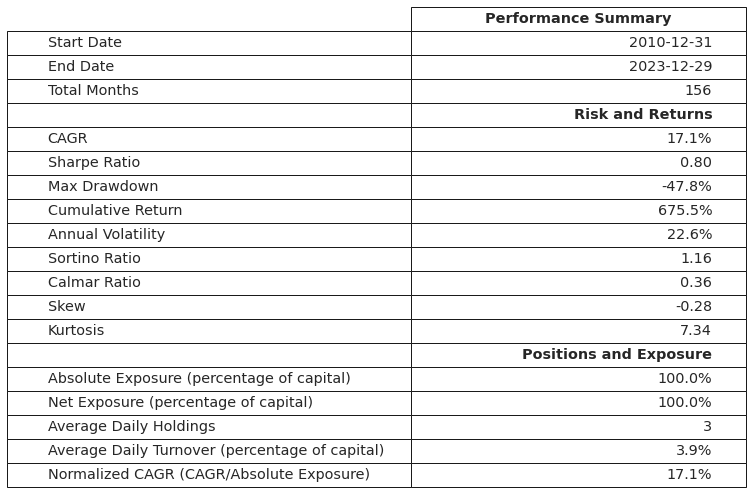

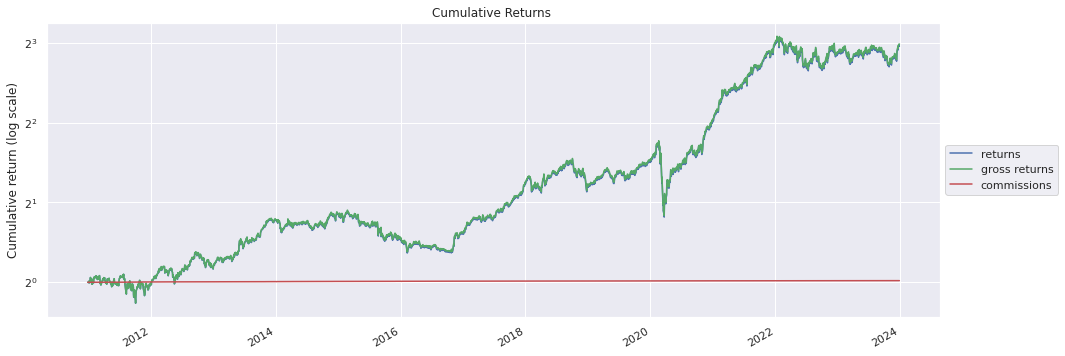

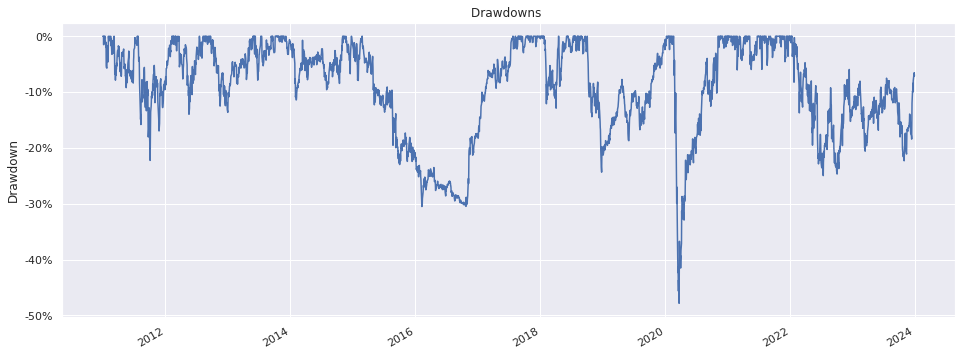

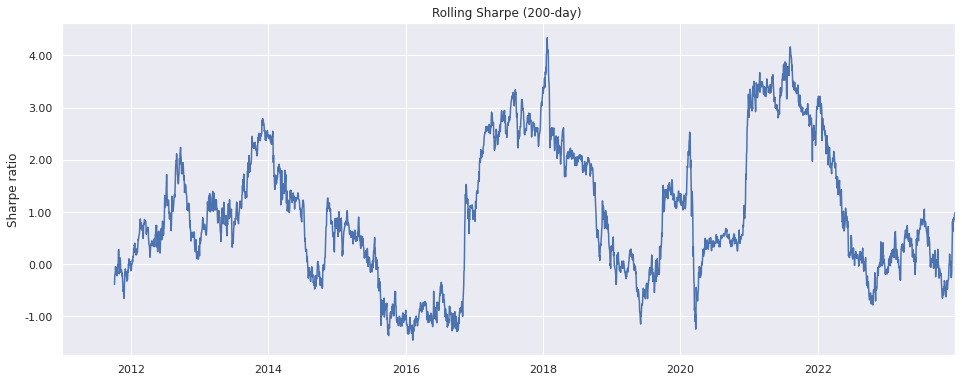

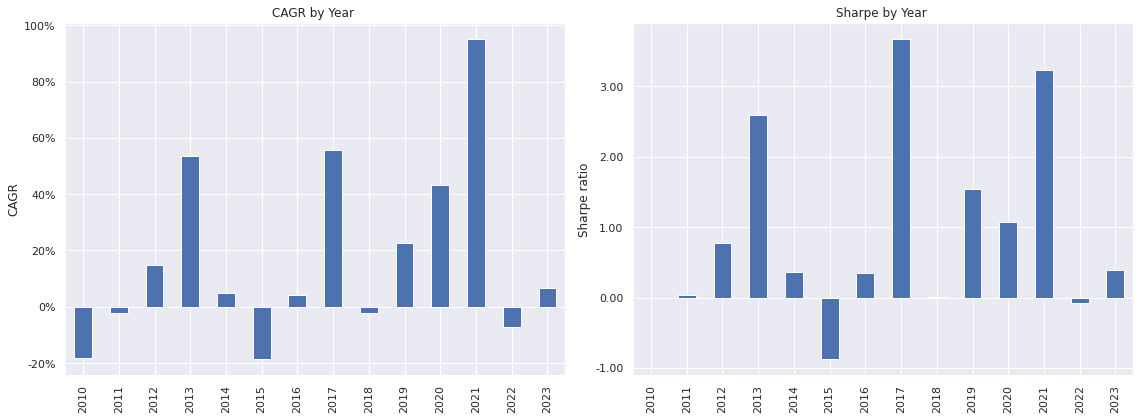

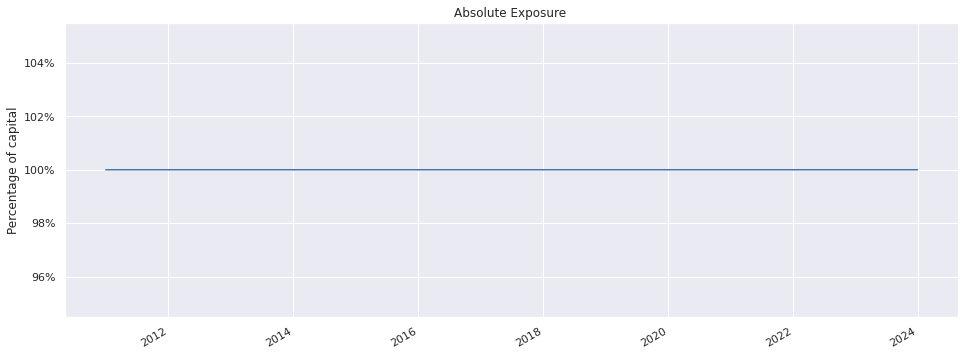

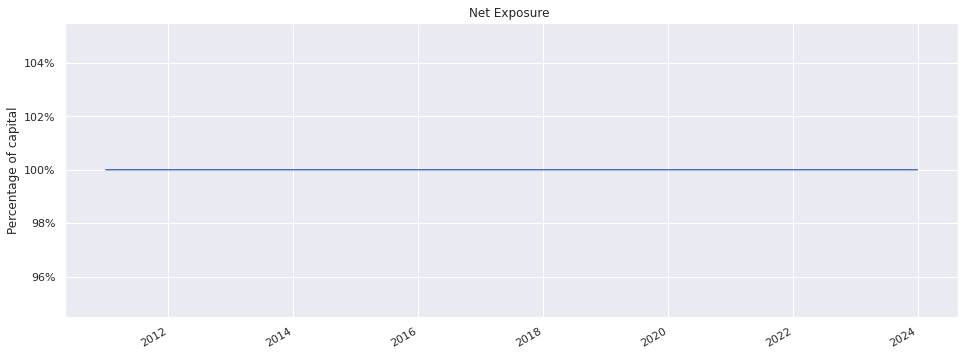

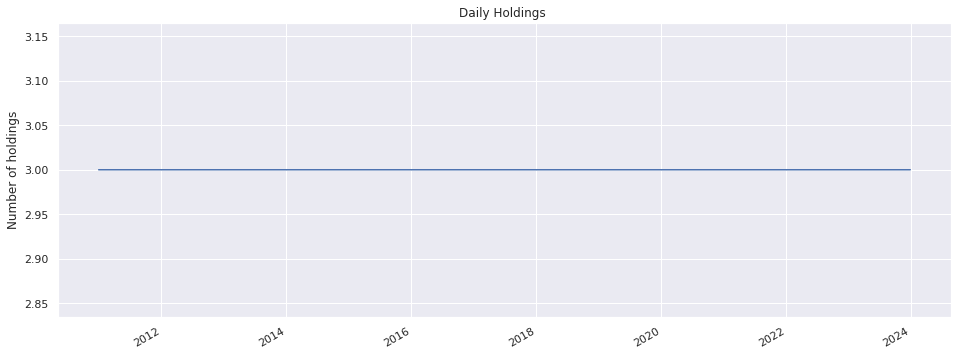

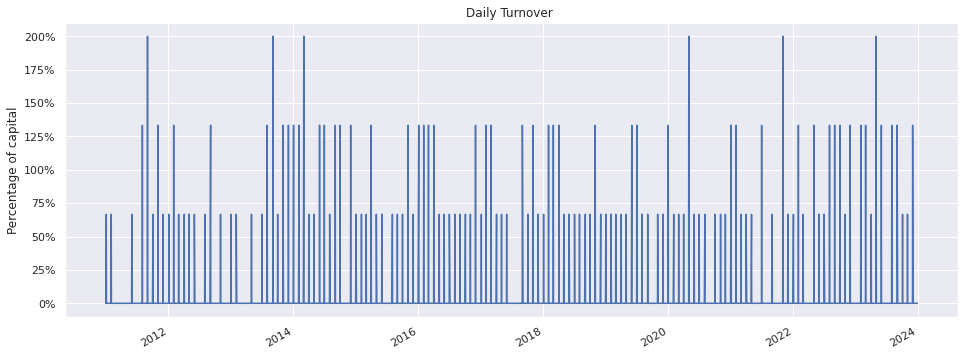

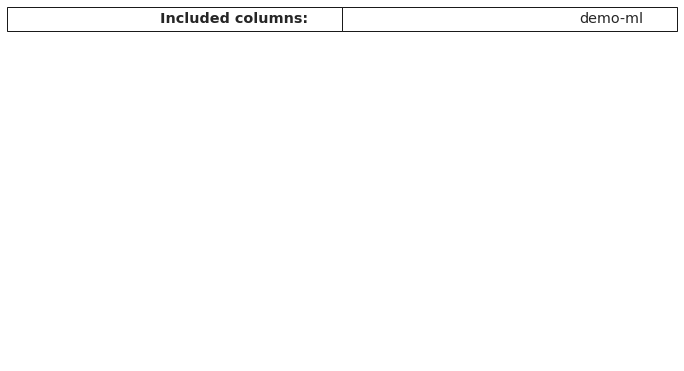

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("demo_ml_rf_results.csv")

***

[Back to Introduction](Introduction.ipynb)